In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xmltodict, json
from simulation import DefaultCIR, ConstPossionJumpsCIR, NormalPossionJumpsCIR

https://www.moex.com/ru/factsheet/history

In [3]:
rusfar = pd.read_csv('data/RUSFAR_2019-01-01__2024-01-01.csv', delimiter=';')
rusfar.head(1)

ID    NAME   TRADEDATE  OPEN  HIGH   LOW CLOSE  VALUE  DURATION  YIELD
0  RUSFAR  RUSFAR  2019-01-09  7,71  7,71  7,71  7,71    NaN       NaN    NaN

https://fred.stlouisfed.org/series/SOFR

In [4]:
sofr = pd.read_csv('data/SOFR_2019-01-01__2024-01-01.csv')
sofr.head(1)

DATE  SOFR
0  2019-01-02  3.15

https://www.moex.com/ru/derivatives/currency-rate.aspx?currency=USD_RUB#

In [5]:
with open('data/USD_RUB_2019-01-01__2024-01-01.xml', 'r') as f:
    usdrub = pd.DataFrame(xmltodict.parse(f.read())['document']['data']['rows']['row'])
usdrub.head(1)

@tradedate @tradetime   @secid     @rate @clearing
0  2023-12-29   18:49:00  USD/RUB  90.02850        vk

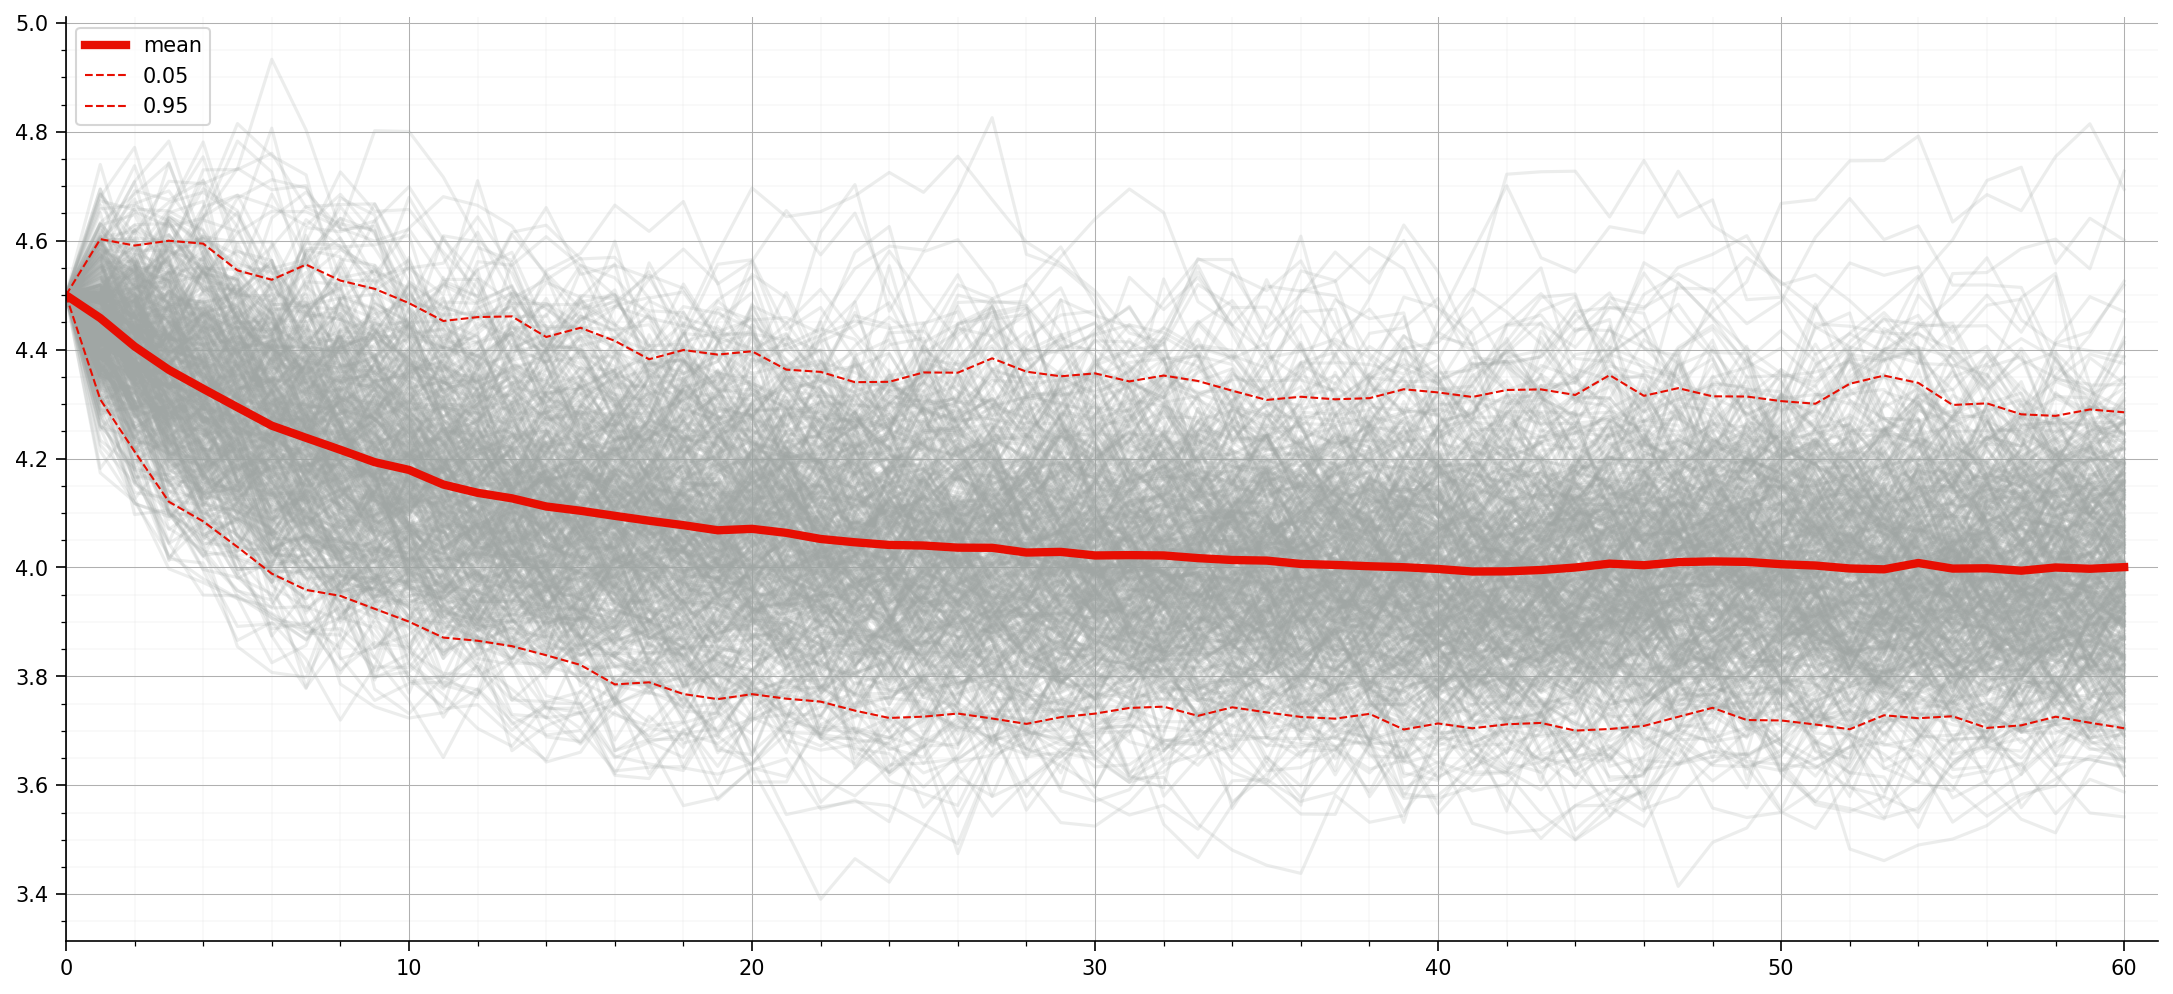

In [20]:
alpha = 0.1
theta = 4
sigma = 0.02
lambda_jump = 0.5
jump_mean = 0.05
jump_std = 0.01
jump_size = 0.05

n_steps = 60
n_paths = 500
dt = 1
r0 = 4.5

cir = DefaultCIR(
    alpha=alpha, 
    theta=theta, 
    sigma=sigma,
)
cir_paths = cir.get_simulated_paths(
    n_steps=n_steps, n_paths=n_paths, dt=dt, r0=r0
)
cir.plot_paths(cir_paths)

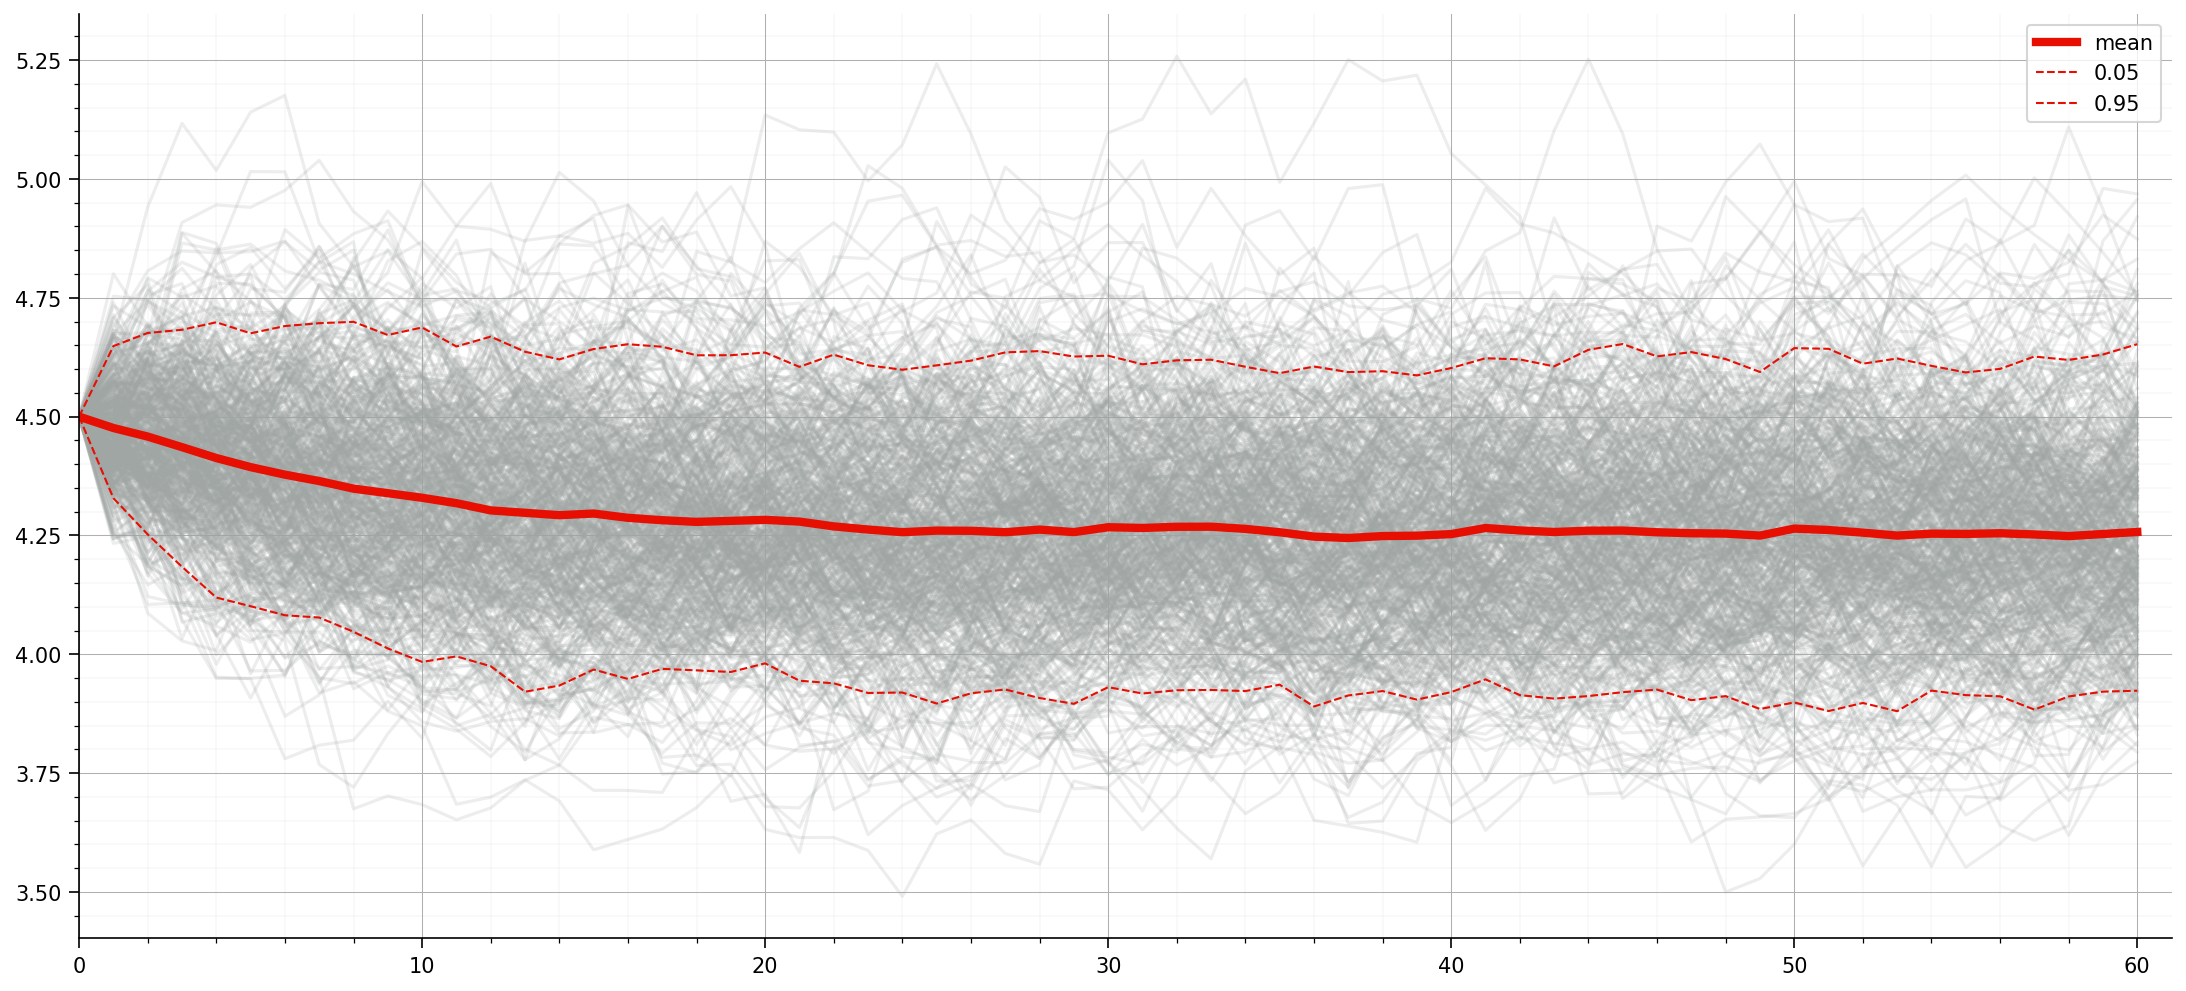

In [21]:
const_poisson = ConstPossionJumpsCIR(
    alpha=alpha, 
    theta=theta, 
    sigma=sigma,
    lambda_jump=lambda_jump,
    jump_size=jump_size,
)
const_poisson_paths = const_poisson.get_simulated_paths(
    n_steps=n_steps, n_paths=n_paths, dt=dt, r0=r0
)
const_poisson.plot_paths(const_poisson_paths)

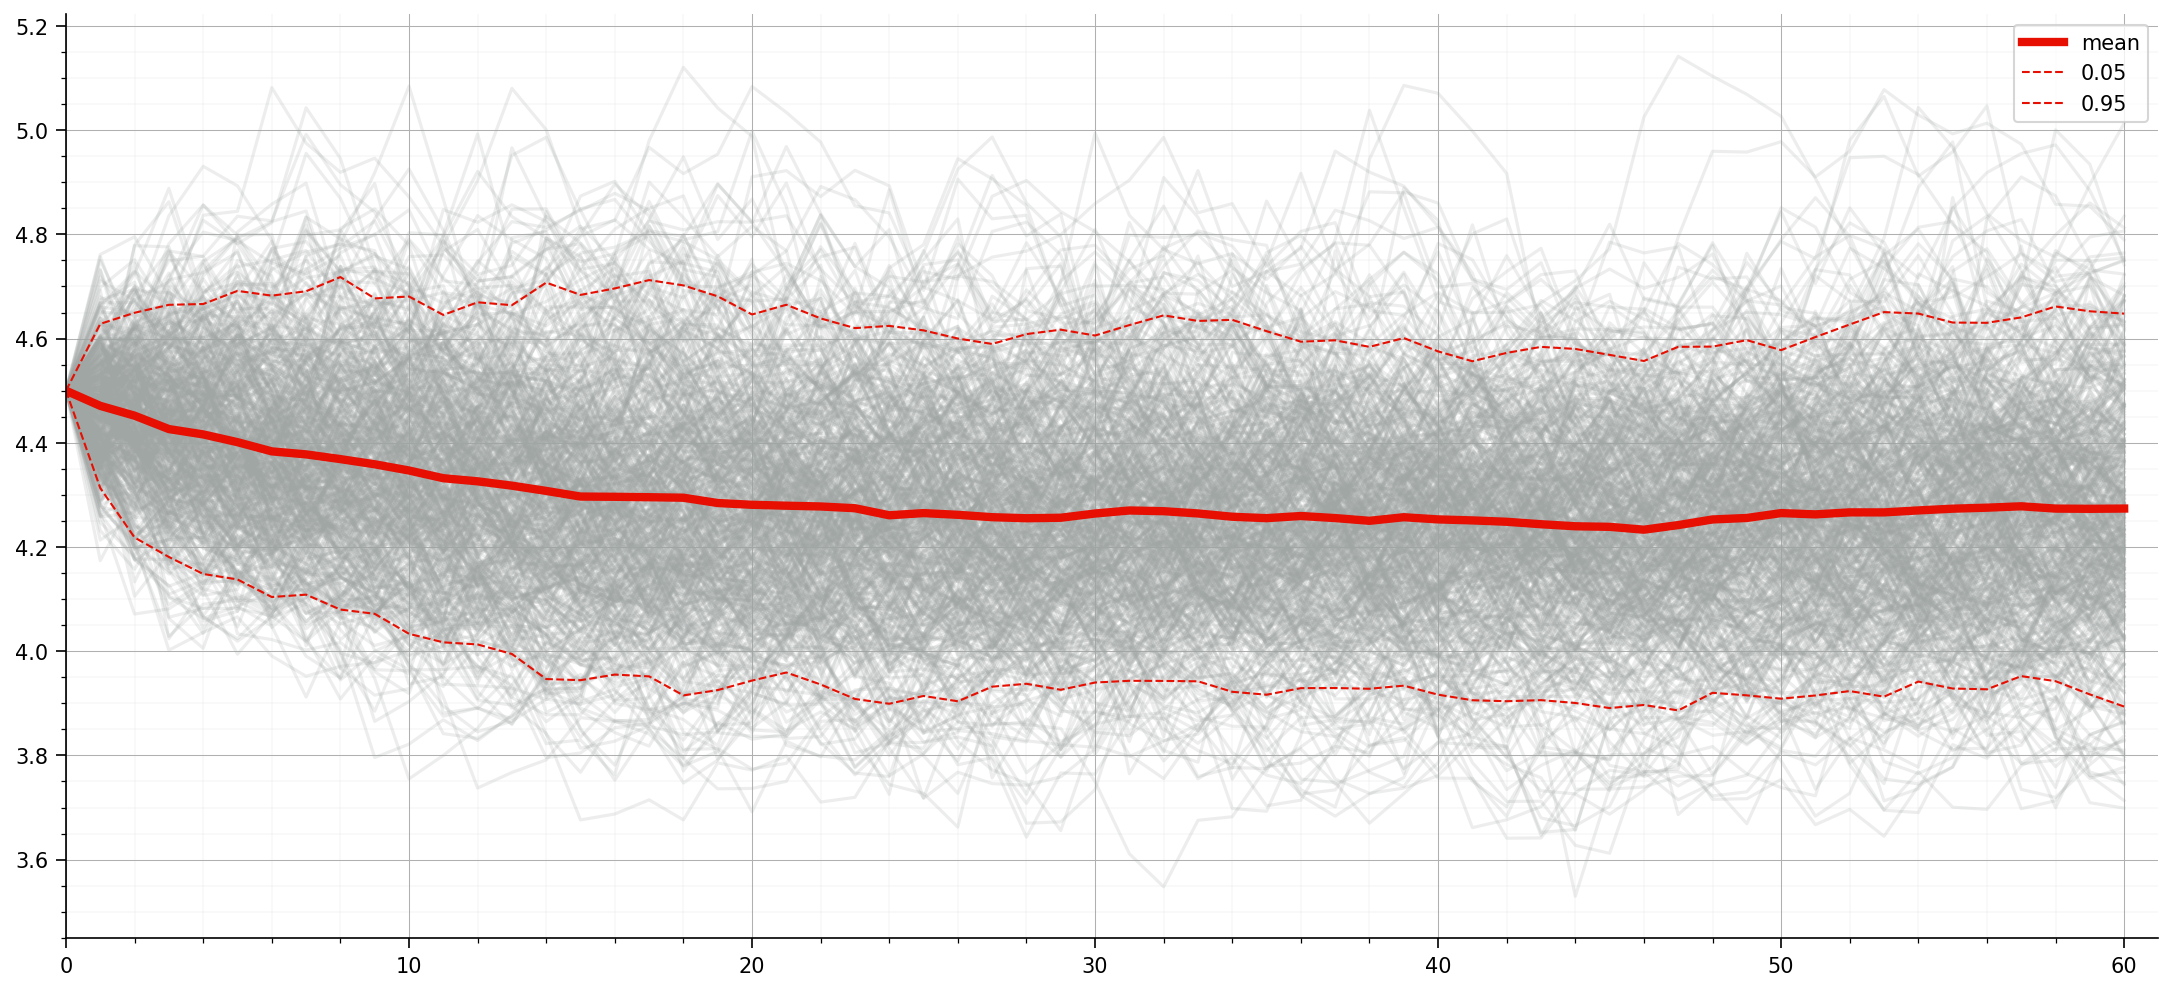

In [22]:
normal_poisson = NormalPossionJumpsCIR(
    alpha=alpha, 
    theta=theta, 
    sigma=sigma,
    lambda_jump=lambda_jump,
    jump_mean=jump_mean,
    jump_std=jump_std
)
normal_poisson_paths = normal_poisson.get_simulated_paths(
    n_steps=n_steps, n_paths=n_paths, dt=dt, r0=r0
)
normal_poisson.plot_paths(normal_poisson_paths)